# GNAR data

SEOYEON CHOI  
2023-01-05

> GNAR

GNAR

-   다변량 시계열이 이전 시간 step에서 인접 노드들에 따라 자기회귀와
    유사한 모델을 따른다고 가정
-   항상 노드의 수가 일정해야 함
-   GNAR은 전제 데이터 set에 대해 이웃을 통해 모델화한다는 것이 장점

In [1]:
import rpy2
import rpy2.robjects as ro 
from rpy2.robjects.vectors import FloatVector 
from rpy2.robjects.packages import importr

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(GNAR)
library(igraph)

R[write to console]: Loading required package: igraph

R[write to console]: 
Attaching package: ‘igraph’


R[write to console]: The following objects are masked from ‘package:stats’:

    decompose, spectrum


R[write to console]: The following object is masked from ‘package:base’:

    union


R[write to console]: Loading required package: wordcloud

R[write to console]: Loading required package: RColorBrewer


## 2.3 GNAR network example

-   edge(list)
-   dist(list)

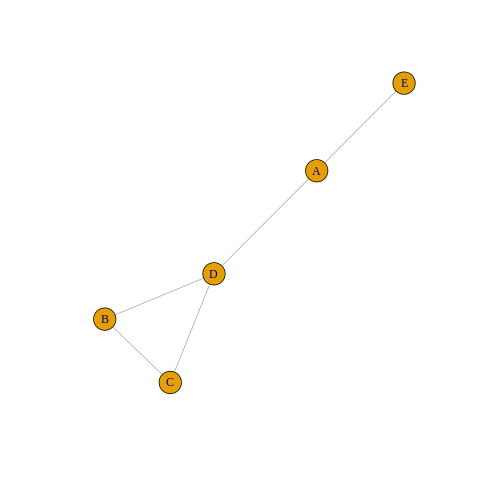

In [4]:
%%R
plot(fiveNet, vertex.label = c("A", "B", "C", "D", "E"))

In [5]:
%%R
summary("fiveNet")

   Length     Class      Mode 
        1 character character 

**other examples**

-   igraphtoGNAR or GNARtoigraph쓰는 예제

In [6]:
%%R
fiveNet2 <- GNARtoigraph(net = fiveNet)
summary(fiveNet2)

IGRAPH 2b4460d U-W- 5 5 -- 
+ attr: weight (e/n)

In [7]:
%%R
fiveNet3 <- igraphtoGNAR(fiveNet2)
all.equal(fiveNet, fiveNet3)

[1] TRUE

In [8]:
%%R
print(igraphtoGNAR(fiveNet2))

GNARnet with 5 nodes 
edges:1--4 1--5 2--3 2--4 3--2 3--4 4--1 4--2 4--3 5--1 
     
 edges of each of length  1 

edge들 보고 싶을 때

whereas the **reverse** conversion would be performed as

In [9]:
%%R
g <- make_ring(10)
print(igraphtoGNAR(g))

GNARnet with 10 nodes 
edges:1--2 1--10 2--1 2--3 3--2 3--4 4--3 4--5 5--4 5--6 
     6--5 6--7 7--6 7--8 8--7 8--9 9--8 9--10 10--1 10--9 
     
 edges of each of length  1 

In [10]:
%%R
make_ring(10)

IGRAPH 22f6be5 U--- 10 10 -- Ring graph
+ attr: name (g/c), mutual (g/l), circular (g/l)
+ edges from 22f6be5:
 [1] 1-- 2 2-- 3 3-- 4 4-- 5 5-- 6 6-- 7 7-- 8 8-- 9 9--10 1--10

이어진 방향으로 각각의 edge를 만들어주는 게 igrapphtoGNAR이다

`GNARtoigraph` function으로 높은 수준의 이웃 구조를 포함한 그래프를
추출할 수 있다.

-   `as.matrix` or `matrixtoGNAR`로 인접 행렬 구할 수 있음

we can prosucean adjacency matrix for the `fiveNet` obeject with

In [11]:
%%R
as.matrix(fiveNet)

     [,1] [,2] [,3] [,4] [,5]
[1,]    0    0    0    1    1
[2,]    0    0    1    1    0
[3,]    0    1    0    1    0
[4,]    1    1    1    0    0
[5,]    1    0    0    0    0

and an example converting a weighted adjacency matrix to a `GNARnet`
object is

In [12]:
%%R
adj <- matrix(runif(9), ncol = 3, nrow = 3)
adj[adj < 0.3] <- 0
print(matrixtoGNAR(adj))

GNARnet with 3 nodes 
edges:1--2 1--3 2--1 2--3 3--1 3--2 
 edges of unequal lengths 

## 2.4. Example: GNAR model fitting

-   GNAR로 fit과 predict 가능

In [13]:
%%R
data("fiveNode")
answer <- GNARfit(vts = fiveVTS, net = fiveNet, alphaOrder = 2, betaOrder = c(1, 1))
answer

Model: 
GNAR(2,[1,1]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
 dmatalpha1  dmatbeta1.1   dmatalpha2  dmatbeta2.1  
    0.20624      0.50277      0.02124     -0.09523  


-   파라메터 4개 가지고 있음

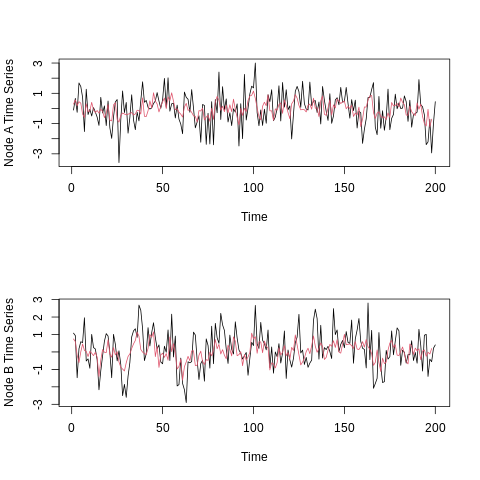

In [14]:
%%R
layout(matrix(c(1, 2), 2, 1))
plot(fiveVTS[, 1], ylab = "Node A Time Series")
lines(fitted(answer)[, 1], col = 2)
plot(fiveVTS[, 2], ylab = "Node B Time Series")
lines(fitted(answer)[, 2], col = 2)

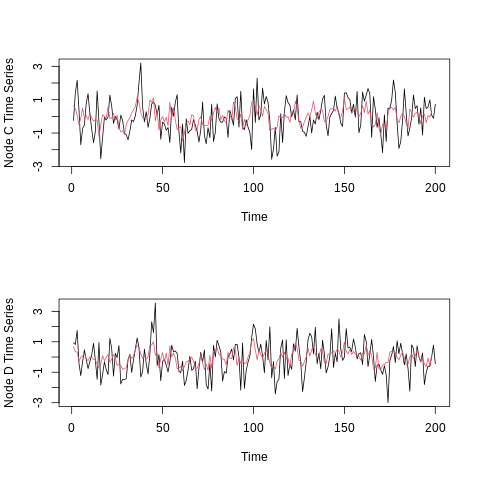

In [15]:
%%R
layout(matrix(c(1, 2), 2, 1))
plot(fiveVTS[, 3], ylab = "Node C Time Series")
lines(fitted(answer)[, 3], col = 2)
plot(fiveVTS[, 4], ylab = "Node D Time Series")
lines(fitted(answer)[, 4], col = 2)

-   각 노드의 time series(검정), fitted values from ‘answer’ model
    overlaid in red

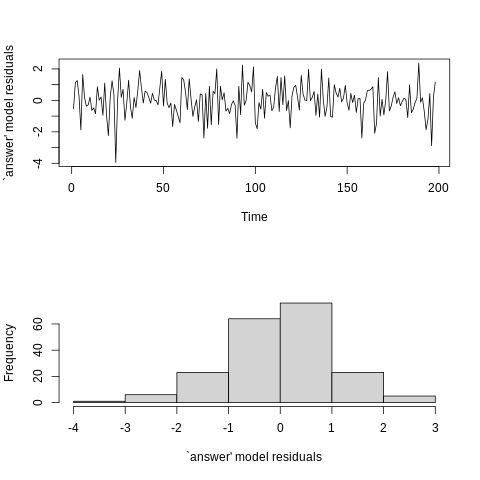

In [16]:
%%R
myresiduals <- residuals(answer)[, 1]
layout(matrix(c(1, 2), 2, 1))
plot(ts(residuals(answer)[, 1]), ylab = "`answer' model residuals")
hist(residuals(answer)[, 1], main = "", xlab = "`answer' model residuals")

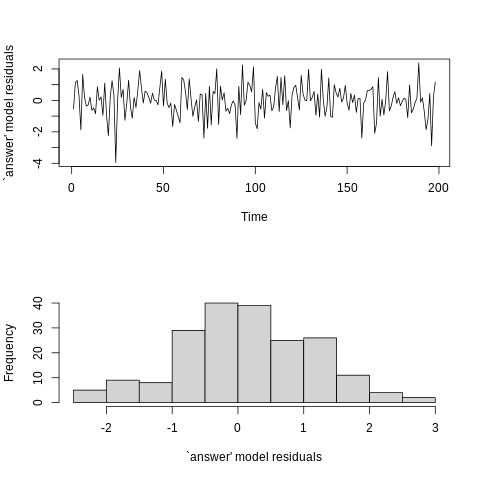

In [17]:
%%R
myresiduals <- residuals(answer)[, 2]
layout(matrix(c(1, 2), 2, 1))
plot(ts(residuals(answer)[, 1]), ylab = "`answer' model residuals")
hist(residuals(answer)[, 2], main = "", xlab = "`answer' model residuals")

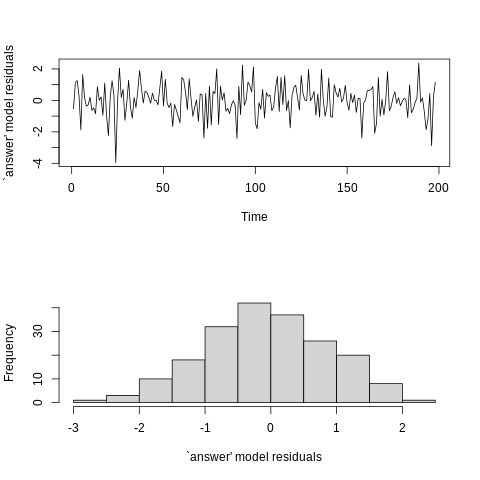

In [18]:
%%R
myresiduals <- residuals(answer)[, 3]
layout(matrix(c(1, 2), 2, 1))
plot(ts(residuals(answer)[, 1]), ylab = "`answer' model residuals")
hist(residuals(answer)[, 3], main = "", xlab = "`answer' model residuals")

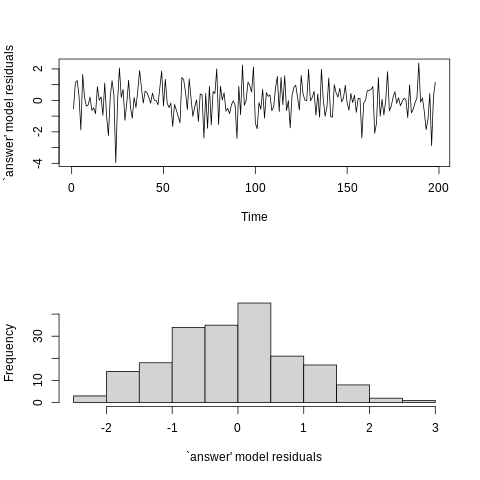

In [19]:
%%R
myresiduals <- residuals(answer)[, 4]
layout(matrix(c(1, 2), 2, 1))
plot(ts(residuals(answer)[, 1]), ylab = "`answer' model residuals")
hist(residuals(answer)[, 4], main = "", xlab = "`answer' model residuals")

-   residual plots from ‘answer’ model fit. Top: time sereies, Bottom:
    Histogram

## 2.5. Example: GNAR data simulation on a given network

-   `fiveNet` 네트워크를 사용하여 네트워크 시계열 시뮬레이션 진행

-   두 시뮬레이션 모두 sigma argument를 사용하여 표준 편차가 제어되는
    표준 정규 노이즈를 사용하여 생성된다.

In [20]:
%%R
set.seed(10)
fiveVTS2 <- GNARsim(n = 200, net = fiveNet, alphaParams = list(c(0.4, 0, -0.6, 0, 0)), betaParams = list(c(0.3)))

-   fiveVTS2 네트워크를 사용하여 시뮬레이션 된 것이다보니 파라메터 계수
    비슷

In [21]:
%%R
print(GNARfit(vts = fiveVTS2, net = fiveNet, alphaOrder = 1, betaOrder = 1, globalalpha = FALSE))

Model: 
GNAR(1,[1]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
dmatalpha1node1  dmatalpha1node2  dmatalpha1node3  dmatalpha1node4  
        0.45902          0.13133         -0.49166          0.03828  
dmatalpha1node5      dmatbeta1.1  
        0.02249          0.24848  


In [22]:
%%R
set.seed(10)
fiveVTS3 <- GNARsim(n = 200, net = fiveNet, alphaParams = list(rep(0.2, 5), rep(0.3, 5)), betaParams = list(c(0.2, 0.3), c(0)))
print(GNARfit(vts = fiveVTS3, net = fiveNet, alphaOrder = 2, betaOrder = c(2,0)))

Model: 
GNAR(2,[2,0]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
 dmatalpha1  dmatbeta1.1  dmatbeta1.2   dmatalpha2  
     0.2537       0.1049       0.3146       0.2907  


In [23]:
%%R
fiveVTS4 <- simulate(GNARfit(vts = fiveVTS2, net = fiveNet, alphaOrder = 1, betaOrder = 1, globalalpha = FALSE), n = 200)
print(GNARfit(vts = fiveVTS4, net = fiveNet, alphaOrder = 1, betaOrder = 1, globalalpha = FALSE))

Model: 
GNAR(1,[1]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
dmatalpha1node1  dmatalpha1node2  dmatalpha1node3  dmatalpha1node4  
      0.4478300       -0.0008695       -0.4822675        0.0523652  
dmatalpha1node5      dmatbeta1.1  
     -0.0063702        0.2249530  


-   위와 같이 GNAR 모델에 있는 시계열을 simulate하기 위해 GNARfit
    object에 대해 simulate S3 method 사용할 수 있다

## 2.6 Missing data and changing connection weights with GNAR models

-   The flexibility of GNAR modelling이 의미하는 것은 연결 가중치를
    바꾸지 않고 변하는 네트워크로 missing data 를 모델링 할 수 있다.
-   한 노드가 missing data 구간이 생기면 그 구간에서만 네트워크를
    변화하여 weight가 변경된다.

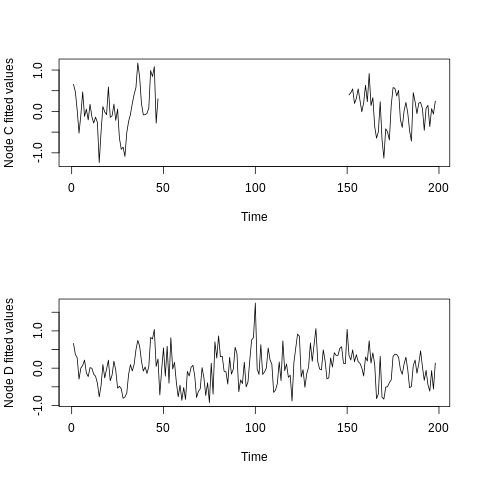

In [24]:
%%R
fiveVTS0 <- fiveVTS
fiveVTS0[50:150, 3] <- NA
nafit <- GNARfit(vts = fiveVTS0, net = fiveNet, alphaOrder = 2, betaOrder = c(1, 1))
layout(matrix(c(1, 2), 2, 1))
plot(ts(fitted(nafit)[, 3]), ylab = "Node C fitted values")
plot(ts(fitted(nafit)[, 4]), ylab = "Node D fitted values")

A key advantage of our parsimonious GNAR model is that it models via
neighborhoods across the entire data set. If a node is missing for a
given time, then it does not contribute to the estimation of
neighborhood parameters that the network structure suggests it should,
and there are plenty of other nodes that do contribute, generally
resulting in a high number of observations to estimate each coefficient.
In GNAR models, missing data of this kind is not a problem.

-   우리의 간결한 GNAR 모델의 주요 장점은 전체 데이터 세트에 걸쳐 이웃을
    통해 모델링한다는 것입니다. 노드가 특정 시간 동안 누락되면 네트워크
    구조가 제안하는 인접 매개 변수의 추정에 기여하지 않으며, 기여하는
    다른 노드도 많아 일반적으로 각 계수를 추정하기 위한 관측치 수가
    많습니다. GNAR 모델에서는 이런 종류의 데이터가 누락되는 것은 문제가
    되지 않습니다.

## 2.7. Stationary conditions for a GNAR process with fixed network

**Theorem 1**

-   *Given an unchanging network, $\mathcal{G}$ a sufficient condition
    for the GNAT model (1) to be stationary is*

$$\sum^p_{j=1}(|\alpha_{i,j}| + \sum^{C}_{c=1} \sum^{s_j}_{r=1} |\beta_{j,t,c}|)<1 , \forall_i \in 1,\dots, N$$

위 조건을 `GNARsim`을 이용하여 확인 할 수 있다.

In [25]:
%%R
set.seed(10)
fiveVTS4 <- GNARsim(n = 200, net = fiveNet, alphaParams = list(rep(0.2, 5)), betaParams = list(c(0.85)))
c(mean(fiveVTS4[1:50, ]), mean(fiveVTS4[51:100, ]), mean(fiveVTS4[101:150, ]), mean(fiveVTS4[151:200, ]))

[1]    -120.511   -1370.216  -15725.884 -180319.140

-   The mean increases rapidly indicating nonstationarity.
-   평균이 빠르게 증가하는 것으로 보아 정상성을 띄고 있지 않다.

## 2.8. Benefits of our model and comparisons to others

## 3.1. Order selection

**Bayesian information criterion**

$$BIC(p,s) = ln|\sum^{\hat{}}_{p,s}| + T^{-1} M ln(T)$$

In [26]:
%%R
BIC(GNARfit())

[1] -0.003953124

In [27]:
%%R
BIC(GNARfit(betaOrder = c(2, 1)))

[1] 0.02251406

**Akaike information criterion**

$$AIC(p,s) = ln|\sum^{\hat{}}_{p,s}| + 2T^{-1} M$$

In [28]:
%%R
AIC(GNARfit())

[1] -0.06991947

In [29]:
%%R
AIC(GNARfit(betaOrder = c(2, 1)))

[1] -0.05994387

## 3.2. Model selection on a wind network time series

the data suite vswind that contains a number of R objects pertaining to
721 wind speeds taken at each of 102 weather stations in England and
Wales. The suite contains the vector time series vswindts, the
associated network vswindnet, a character vector of the weather station
location names in vswindnames and coordinates of the stations in the two
column matrix vswindcoords. The data originate from the UK Met Office
site http://wow.metoffice.gov.uk and full details can be found in the
vswind help file in the GNAR package.

-   nodes : 102
-   time step : 721

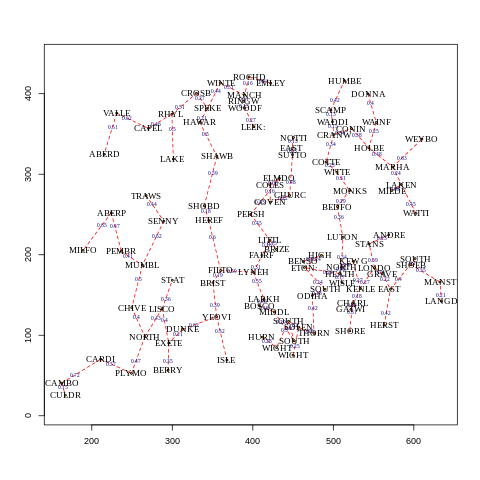

In [30]:
%%R
oldpar <- par(cex = 0.75)
windnetplot()
par(oldpar)

Plot of the wind speed network

-   blue numbers are relative distance between sites
-   labels are the site name

In [31]:
%%R
BIC(GNARfit(vts = vswindts, net = vswindnet, alphaOrder = 1, betaOrder = 0))

[1] -233.3848

In [61]:
%%R 
fiveFit <- GNARfit(fiveVTS[1:160,],net=fiveNet, alphaOrder=2, betaOrder=c(2,0)) #learn 
dim(fitted(fiveFit))

[1] 158   5

In [109]:
%%R
dummyFit <- GNARfit(fiveVTS,net=fiveNet, alphaOrder=2, betaOrder=c(2,0)) #learn 
dummyFit$mod$coefficients <- fiveFit$mod$coefficients

In [111]:
%%R
fitted(dummyFit)[161:200]

 [1]  0.01093152  0.07611113  0.50989356  0.84380803  0.90488185 -0.12703505
 [7] -0.57721780 -0.36681689 -0.26281975 -0.47712098 -0.62293008 -0.58121816
[13] -0.81149078 -0.45403821 -0.60487041  0.28617606  0.20580455  0.19341988
[19]  0.35296420  0.15628117  0.68350847  0.49043974  0.29627168 -0.35666858
[25] -0.47565960  0.06692171 -0.14924170 -0.36616239 -0.49994894  0.22625500
[31] -0.08023045  0.25371268 -0.47415540 -0.99390660 -1.16821429 -0.18438203
[37] -1.10766872 -0.76969390  0.71828989  0.69737474

In [71]:
%%R
fitted(fiveFit)

               [,1]         [,2]         [,3]          [,4]         [,5]
  [1,]  0.300764573  0.731759572  0.645747192  0.6590441235  0.329408573
  [2,]  0.584155581  0.709939766  0.504838042  0.4006542005  0.002404727
  [3,]  0.248206643 -0.053672929  0.089912292  0.3569760840  0.886027241
  [4,]  0.431422029 -0.596332784 -0.445500333 -0.1950437084  0.998677531
  [5,]  0.369251545 -0.131646096 -0.151852774 -0.0307057532  0.602574799
  [6,] -0.281163998  0.372761568  0.470612441  0.0640593261 -0.793452225
  [7,] -0.629184394  0.122210560 -0.064188223  0.2614228537  0.027403171
  [8,]  0.176102146  0.054605602  0.001654112 -0.0679337406 -0.041235943
  [9,] -0.168610998 -0.212095723 -0.204125726 -0.2125261302 -0.010579734
 [10,] -0.161421278 -0.007465513  0.149274060 -0.0249484567 -0.327041759
 [11,]  0.359655447 -0.077039236 -0.039580520 -0.0457447866  0.112500734
 [12,] -0.015390804 -0.224700395 -0.236137628 -0.1566997305 -0.032236173
 [13,] -0.254595294 -0.052425427 -0.222029463 -0.19

In [50]:
%%R 
fiveVTS
#gdpVTSn2[52,]

               [,1]         [,2]         [,3]         [,4]        [,5]
  [1,] -0.106526553  1.077613724 -0.244694569  0.933710066  0.44443593
  [2,]  0.664495737  0.935476457  1.402823610  0.826656526  0.02097885
  [3,] -0.255977521 -1.478171940  2.160938890  1.746276180  0.80188586
  [4,]  1.684436464  0.180662387  0.398879113 -0.418094544  0.28037722
  [5,]  1.451205104  0.584157057 -1.700218367 -1.219724913  1.63810802
  [6,]  0.728846398  0.536253148 -0.730310794 -0.297010221  1.04864255
  [7,] -1.526780869  1.957817106 -0.506088728  0.470747730 -0.63167929
  [8,]  1.269035583 -0.519870107  0.773038576 -0.176065931 -3.13354575
  [9,] -0.403340381 -0.398760476  1.358212255 -0.755544421  1.58592625
 [10,] -0.057805476 -0.932876792  0.163580296 -0.299486667 -0.31232748
 [11,] -0.498505318  1.005323196 -0.762045202  0.136725053 -0.43412619
 [12,]  0.057551667  0.252414834 -1.585146661  0.892773199  0.64534882
 [13,] -0.235969810  0.168738145 -0.927906887 -0.201182245  0.28394360
 [14,]

In [33]:
%%R
BIC(GNARfit(vts = vswindts, net = vswindnet, alphaOrder = 1, betaOrder = 0, globalalpha = FALSE))

[1] -233.1697

In [ ]:
%%R
BIC.Alpha2.Beta <- matrix(0, ncol = 15, nrow = 15)
for(b1 in 0:14)
    for(b2 in 0:14)
        BIC.Alpha2.Beta[b1 + 1, b2 + 1] <- BIC(GNARfit(vts = vswindts,
                    net = vswindnet, alphaOrder = 2, betaOrder = c(b1, b2)))
contour(0:14, 0:14, log(251 + BIC.Alpha2.Beta), xlab = "Lag 1 Neighbour Order", ylab = "Lag 2 Neighbour Order")

Exception ignored from cffi callback <function _processevents at 0x7f1829767f70>:
Traceback (most recent call last):
  File "/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/rpy2/rinterface_lib/callbacks.py", line 277, in _processevents
    try:
KeyboardInterrupt: 
Exception ignored from cffi callback <function _processevents at 0x7f1829767f70>:
Traceback (most recent call last):
  File "/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/rpy2/rinterface_lib/callbacks.py", line 277, in _processevents
    try:
KeyboardInterrupt: 
Exception ignored from cffi callback <function _processevents at 0x7f1829767f70>:
Traceback (most recent call last):
  File "/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/rpy2/rinterface_lib/callbacks.py", line 277, in _processevents
    try:
KeyboardInterrupt: 

-   a set of `GNAR(2,[b1,b2])` models with b1, b2 ranging from zero to
    14
-   Contour plot of BIC values for the two-lag autoregressive model
    incorporating b1-stage and b2-stage neighbours at time lags one and
    two. Values shown are log(251 + BIC) to display clearer contours.

*이해 덜 됨..*

-   increasing the lag two neighbour sets beyond first stage neighbours
    would appear to increase the BIC for those lag one neighbour stages
    greater than five

*chatGPT*

이 문장을 조금 더 자세히 설명하면, BIC(Bayesian Information Criterion)는
모델을 선택할 때 사용하는 지표로서, 우리가 선택한 모델이 얼마나
적합한지를 측정합니다. 이 문장에서는, 이웃 집합의 대기 시간이 증가할수록
BIC 값이 증가할 것이라고 언급하고 있습니다. 이는 우리가 선택한 모델이
적합하지 않을 가능성이 있다는 의미입니다. 그래프를 보고 있을 때, 수평
윤곽선은 BIC 값이 0인 스테이지를 의미합니다. 이는 우리가 선택한 모델이
완벽하게 적합한다는 의미입니다.

In [36]:
%%R
goodmod <- GNARfit(vts = vswindts, net = vswindnet, alphaOrder = 2, betaOrder = c(5, 1))
goodmod

Model: 
GNAR(2,[5,1]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
 dmatalpha1  dmatbeta1.1  dmatbeta1.2  dmatbeta1.3  dmatbeta1.4  dmatbeta1.5  
    0.56911      0.10932      0.03680      0.02332      0.02937      0.04709  
 dmatalpha2  dmatbeta2.1  
    0.23424     -0.04872  


## 3.3. Constructing a network to aid prediction

We propose a network construction method that uses prediction error, but
note here that our scope is **not to estimate an underlying network**,
but merely to find a structure that is useful in the task of prediction.

we use a prediction error measure, understood as the sum of squared
differences between the observations and the estimates:

$$\sum^N_{i=1} (X_{i,t} - \hat{X}_{i,t})^2$$

In [37]:
%%R
prediction <- predict(GNARfit(vts = fiveVTS[1:199,], net = fiveNet, alphaOrder = 2, betaOrder = c(1, 1)))
prediction

Time Series:
Start = 1 
End = 1 
Frequency = 1 
    Series 1  Series 2  Series 3  Series 4   Series 5
1 -0.6427718 0.2060671 0.2525534 0.1228404 -0.8231921

## 4. OECD GDP: Network structure aids prediction

GOP growth rate time series

-   35 countries from the OECD website

-   time series : 1961 - 2013

-   T = 52

-   Nodes = 35

-   In this data set 20.8% (379 out of 1820) of the observations were
    missing due to some nodes not being included from the start.

-   we do not uese covariate information, so C=1

R[write to console]: Loading required package: spam

R[write to console]: Spam version 2.8-0 (2022-01-05) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

R[write to console]: 
Attaching package: ‘spam’


R[write to console]: The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


R[write to console]: Loading required package: viridis

R[write to console]: Loading required package: viridisLite

R[write to console]: 
Try help(fields) to get started.


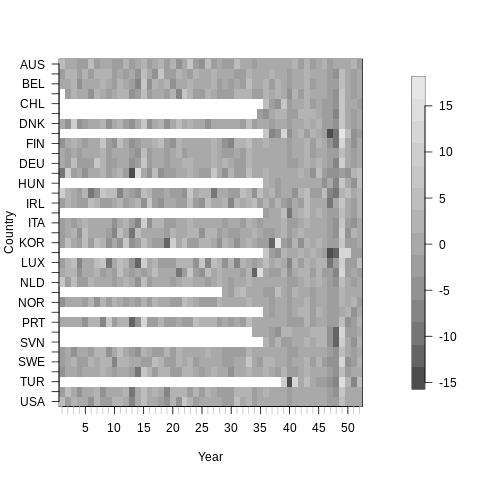

In [38]:
%%R
library("fields")
layout(matrix(c(1, 2), nrow = 1, ncol = 2), widths = c(4.5, 1))
image(t(apply(gdpVTS, 1, rev)), xaxt = "n", yaxt = "n", col = gray.colors(14), xlab = "Year", ylab = "Country")
axis(side = 1, at = seq(from = 0, to = 1, length = 52), labels = FALSE, col.ticks = "grey")
axis(side = 1, at = seq(from = 0, to = 1, length = 52)[5*(1:11)], labels = (1:52)[5*(1:11)])
axis(side = 2, at = seq(from = 1, to = 0, length = 35), labels = colnames(gdpVTS), las = 1, cex = 0.8)
layout(matrix(1))
image.plot(zlim = range(gdpVTS, na.rm = TRUE), legend.only = TRUE, col = gray.colors(14))

Heat plot(grey scale) of the differenced time series,

-   white space indicates missing time series observations

## 4.1. Finding a network to aid prediction

In [39]:
%%R
net1 <- seedToNet(seed.no = seed.nos[1], nnodes = 35, graph.prob = 0.15)
net2 <- seedToNet(seed.no = seed.nos[2], nnodes = 35, graph.prob = 0.15)

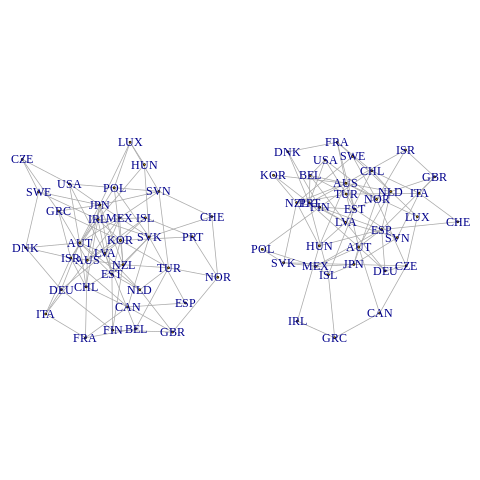

In [40]:
%%R
layout(matrix(c(2, 1), 1, 2))
par(mar=c(0,1,0,1))
plot(net1, vertex.label = colnames(gdpVTS), vertex.size = 0)
plot(net2, vertex.label = colnames(gdpVTS), vertex.size = 0)

-   Erdos-Renyi random graphs xonstructed from the first two elements of
    the `seed.nos` variable with 35 nodes and connection probability
    0.15.

-   자기회귀 모델인 GNAR 모델을 예측에 사용할 때, 어떤 네트워크가 가장
    적합한지 조사해야 함.

-   이때 각 노드의 자기 상관 함수를 이용한 초기 분석 결과, 2차 자기회귀
    구성 요소가 충분할 것으로 예상되어 p = 2까지의 GNAR 모델을 시험함.

-   각 시간 지연에서 최대 2개의 이웃 집합을 포함함.

-   이에 따라 아래와 같은 GNAR 모델이 시험됨.

    -   GNAR(1, \[0\]), GNAR(1, \[1\]), GNAR(2, \[0, 0\]), GNAR(2, \[1,
        0\]), GNAR(2, \[1, 1\]), GNAR(2, \[2, 0\]), GNAR(2, \[2, 1\]),
        그리고 GNAR(2, \[2, 2\])가 시험되며, 각각 individual-$\alpha$와
        global-$\alpha$ GNAR 모델로 적합함.
    -   총 16개의 모델이 생성됨.
    -   이 중에서 전체 GDP 예측에 사용할 GNAR 모델을 선택할 것.
    -   연결 확률이 0.15인 10,000개의 임의의 양방향 네트워크를 생성하고,
        위에서 언급한 GNAR 모델을 이용해 예측할 것.
    -   그래서 이 예제는 상당한 계산 시간이 필요(데스크탑 PC에서 약
        90분).
    -   이를 위해 아래 코드에는 일부 분석만 포함.
    -   계산 상의 이유로, 우선 각 노드에서 표준 편차로 나눠서 잔차가 각
        노드에서 동일한 분산을 가지게 함.
    -   seedSim 함수는 예측값과 원래 값의 제곱 차이의 합을 출력하고,
        이를 예측 정확도의 측정 기준으로 사용

In [41]:
%%R
gdpVTSn <- apply(gdpVTS, 2, function(x){x / sd(x[1:50], na.rm = TRUE)})
alphas <- c(rep(1, 2), rep(2, 6))
betas <- list(c(0), c(1), c(0, 0), c(1, 0), c(1, 1), c(2, 0), c(2, 1), c(2, 2))
seedSim <- function(seedNo, modelNo, globalalpha){
    net1 <- seedToNet(seed.no = seedNo, nnodes = 35, graph.prob = 0.15)
    gdpPred <- predict(GNARfit(vts = gdpVTSn[1:50, ], net = net1,
                               alphaOrder = alphas[modelNo], betaOrder = betas[[modelNo]],
                               globalalpha = globalalpha))
    return(sum((gdpPred - gdpVTSn[51, ])^2))
    }

In [42]:
%%R
seedSim(seedNo = seed.nos[1], modelNo = 1, globalalpha = TRUE)

[1] 23.36913

In [43]:
%%R
seedSim(seed.nos[1], modelNo = 3, globalalpha = TRUE)

[1] 11.50739

In [44]:
%%R
seedSim(seed.nos[1], modelNo = 3, globalalpha = FALSE)

[1] 18.96766

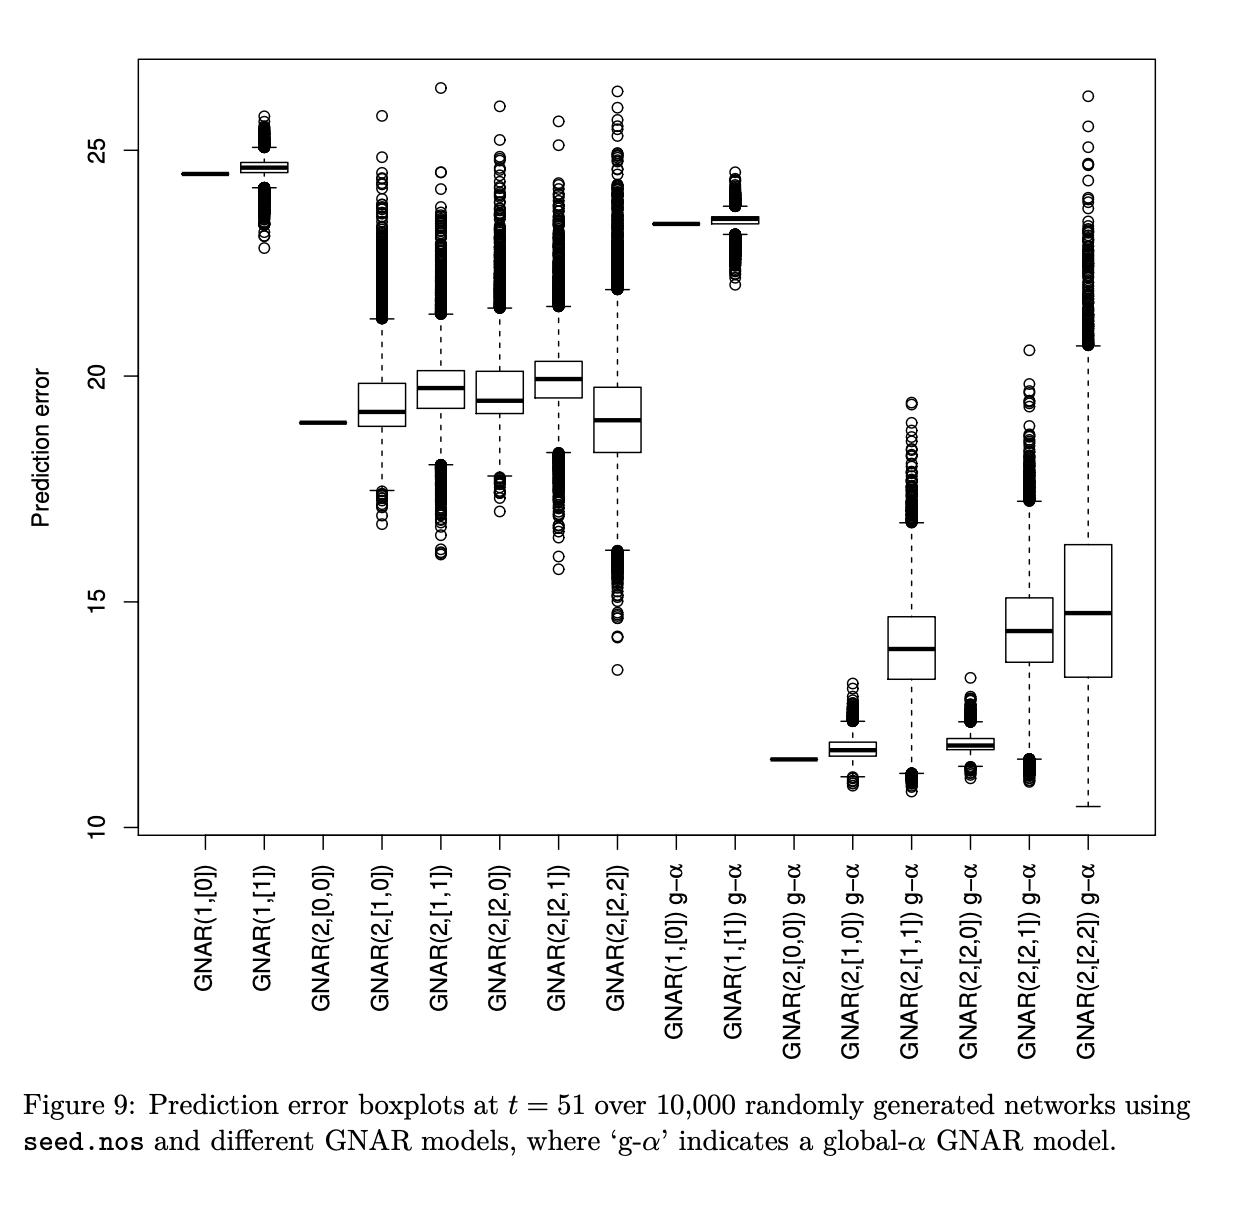

-   10,000개의 임의의 네트워크와 16개의 모델로부터 시뮬레이션한 예측
    오류의 박스 그래프
-   (계산 시간이 길어(90분) 코드는 생략).
-   일반적으로 global-α 모델은 더 낮은 예측 오류를 일으킴.
-   그래서 이 버전의 GNAR 모델을 사용할 것.
-   그림 9에서 첫 번째 모델인 GNAR(1, \[0\])과 세 번째 모델인 GNAR(2,
    \[0, 0\])의 경우, “박스 그래프”는 인접한 매개변수가 적합되지 않아
    결과가 전부 동일해 짧은 수평선으로 표시됨.
-   다른 global-α 모델들은 이 안에 포함되어 있기 때문에, global-α
    GNAR(2, \[2, 2\])의 예측 오류가 최소가 되는 임의의 그래프를 선택할
    것.
-   이는 seed.nos\[921\]에서 생성된 네트워크가 선택되게 됩니다.

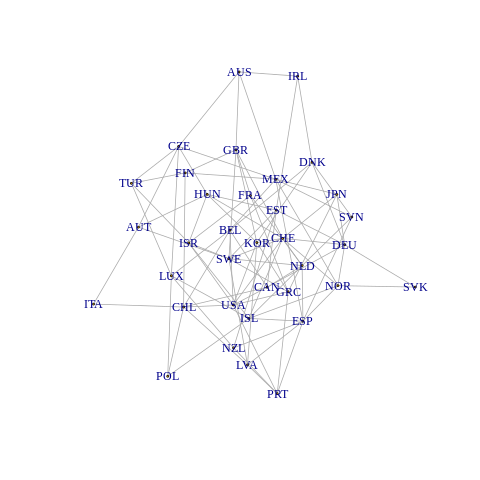

In [45]:
%%R
net921 <- seedToNet(seed.no = seed.nos[921], nnodes = 35, graph.prob = 0.15)
layout(matrix(c(1), 1, 1))
plot(net921, vertex.label = colnames(gdpVTS), vertex.size = 0)

Randomly generated un-weighted and un-directed graph over the OECD
ountries that minimises the prediction error at t = 51 using GNAR(2,
\[2, 2\]).

-   seed.nos\[921\]에서 생성된 네트워크
-   네트워크에는 전부 2개 이상의 이웃을 가지고 있는 countries들이 있고,
    총 97개의 edges이 있음.
-   이 “921” 네트워크는 GDP 예측을 위해 생성되었기 때문에, 찾은
    네트워크에 인식 가능한 구조가 있지 않을 것이라고 예상할 수 있음
-   그러나 미국, 멕시코, 캐나다는 각각 8개, 8개, 6개의 edge을 가지고
    있어 매우 잘 연결되어 있음.
-   스웨덴과 칠레도 잘 연결되어 있으며, 각각 8개와 7개의 edge을 가지고
    있습니다.
-   예측 성능이 유사한 적은 개수의 edge를 가진 네트워크를 찾기 위해
    테스트 될 수 있지만, 여기서는 전체 선택된 네트워크를 그대로 사용.
-   이 네트워크를 사용하면 BIC를 이용해 최적의 GNAR 순서를 선택할 수
    있음.

In [46]:
%%R
res <- rep(NA, 8)
for(i in 1:8){
    res[i] <- BIC(GNARfit(gdpVTSn[1:50, ],
                          net = seedToNet(seed.nos[921], nnodes = 35, graph.prob = 0.15),
                          alphaOrder = alphas[i], betaOrder = betas[[i]]))}
order(res)

[1] 6 3 4 7 8 5 1 2

In [47]:
%%R
sort(res)

[1] -64.44811 -64.32155 -64.18751 -64.12683 -64.09656 -63.86919 -60.67858
[8] -60.54207

## 4.2. Results and comparisons

-   이전 섹션의 모델을 사용해 t=52일 때의 값을 예측
-   이 예측 오류를 표준 AR과 VAR 모델을 사용해 찾은 예측 오류와 비교
-   GNAR 예측은 선택된 네트워크(seed.nos\[921\]에 해당)를 가진 GNAR(2,
    \[2, 0\]) 모델을 t=51까지의 데이터에 적합시키고, t=52일 때의 값을
    예측
-   우선 series를 정규화한 다음, 모델 적합으로부터 SSE를 계산합니다.

In [48]:
%%R
gdpVTSn2 <- apply(gdpVTS, 2, function(x){x / sd(x[1:51], na.rm = TRUE)})
gdpFit <- GNARfit(gdpVTSn2[1:51,], net = net921, alphaOrder = 2, betaOrder = c(2, 0))
summary(gdpFit)


Call:
lm(formula = yvec2 ~ dmat2 + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4806 -0.5491 -0.0121  0.5013  3.1208 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
dmat2alpha1  -0.41693    0.03154 -13.221  < 2e-16 ***
dmat2beta1.1 -0.12662    0.05464  -2.317   0.0206 *  
dmat2beta1.2  0.28044    0.06233   4.500  7.4e-06 ***
dmat2alpha2  -0.33282    0.02548 -13.064  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8926 on 1332 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.1859,    Adjusted R-squared:  0.1834 
F-statistic: 76.02 on 4 and 1332 DF,  p-value: < 2.2e-16

GNAR BIC: -62.86003

In [49]:
%%R
sum((predict(gdpFit) - gdpVTSn2[52, ])^2)

[1] 5.737203

이 GNAR 모델의 적합된 매개변수는
$\alpha^1 = - 0.42, \beta^1,1 = - 0.13, \beta^1,2 = 0.28$, 그리고
$\alpha^2 = - 0.33$입니다.

| Model            | parameters | prediction error |
|:-----------------|-----------:|-----------------:|
| GNAR(2,\[2,0\])  |          4 |              5.7 |
| Individual AR(2) |         38 |              8.1 |
| VAR(1)           |        199 |             26.2 |

Estimated prediction error of differenced real GDP change at t = 52 for
all 35 countries.

우리의 방법과 CRAN forecast 패키지의 버전 8.0에서의 forecast.ar()과
auto.arima() 함수를 사용해 각 노드별로 AR 모델을 적합한 결과를 비교

-   섹션 4.1의 자기상관 분석을 고려해 각각 35개의 개별 모델의 최대 AR
    순서를 p=2로 설정

In [50]:
%%R
library("forecast")
arforecast <- apply(gdpVTSn2[1:51, ], 2, function(x){
            forecast(auto.arima(x[!is.na(x)], d= ,D=0,max.p = 2,max.q=0,
                                max.P=0,max.Q = 0,stationary = TRUE, seasonal = FALSE), ic = "bic",
                     allowmean = FALSE, allowdraft = FALSE, trace = FALSE, h=1)$mean
})
sum((arforecast - gdpVTSn2[52, ])^2)

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


[1] 7.8974

We fit the model using the VAR function and then use the restrict
function to reduce dimensionality further, by setting to zero any
coefficient whose associated absolute t-statistic value is less than
two.

In [59]:
%%R
library("vars")
gdpVTSn2.0 <- gdpVTSn2
gdpVTSn2.0[is.na(gdpVTSn2.0)] <- 0
varforecast <- predict(restrict(VAR(gdpVTSn2.0[1:51, ], p = 1, type = "none")), n.ahead = 1)

compute the prediction error

In [60]:
%%R
getfcst <- function(x){return(x[1])}
varforecastpt <- unlist(lapply(varforecast$fcst, getfcst))
sum((varforecastpt - gdpVTSn2.0[52, ])^2)

[1] 26.19805

GNAR 모델은 AR과 VAR 결과보다 적은 예측 오류를 제공합니다. 이는 AR과
비교했을 때 29%가 줄어들고, VAR과 비교했을 때 78%가 줄어듭니다.

위 절차를 반복해 2단계 앞으로의 예측을 기반으로 분석을 수행합니다.

이 경우 다른 네트워크가 GNAR(2,\[2,2\]) 모델의 예측 오류를 최소화합니다.

그러나 BIC 단계에서 GNAR(2,\[0,0\]) 모델이 최적으로 적합된 것을
식별하였고, 이는 네트워크 회귀 매개변수를 포함하지 않는 모델입니다.

In [61]:
%%R
library("vars")
gdpVTSn2.0 <- gdpVTSn2
gdpVTSn2.0[is.na(gdpVTSn2.0)] <- 0
varforecast <- predict(restrict(VAR(gdpVTSn2.0[1:51, ], p = 1, type = "none")), n.ahead = 40)